In [199]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import load_diabetes
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [200]:
data=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes.csv')
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [201]:
data.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [204]:
cols=[ 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi','dpf', 'age']
data[cols]=data[cols].replace(0,np.nan)

In [206]:
data.dropna(inplace=True)
data['diabetes']=np.int_(data['diabetes'])
data.head()


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51,1
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32,1


In [162]:
X = np.array(data.drop('diabetes',axis=1))
y = np.array(data['diabetes'])

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [164]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [142]:
class CustomKNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [distance.chebyshev(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [195]:
knn=CustomKNN()
knn.fit(X_train,y_train)

In [196]:
y_pred=knn.predict(X_test)

In [197]:
accuracy,precision,recall,f1=accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred),f1_score(y_test,y_pred)

In [198]:
print(f" accuracy:{accuracy:.4f}\n precision:{precision:.4f}\n recall:{recall:.4f}\n f1 score:{f1:.4f}\n")

 accuracy:0.7347
 precision:0.6154
 recall:0.5000
 f1 score:0.5517



<Axes: >

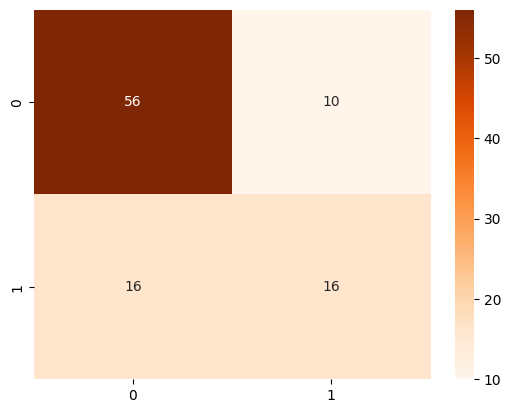

In [147]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Oranges')